In [107]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [108]:
df=pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [110]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [111]:
#Checking for null values

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [112]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [113]:
#Keeping only those features that are relevant

df.drop(columns=['DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','JobInvolvement','JobLevel','MonthlyRate',
                'StandardHours', 'StockOptionLevel'],inplace=True)

In [114]:
len(df.columns)

26

In [115]:
df.iloc[1]

Age                                             49
Attrition                                       No
BusinessTravel                   Travel_Frequently
Department                  Research & Development
DistanceFromHome                                 8
Education                                        1
EducationField                       Life Sciences
EnvironmentSatisfaction                          3
Gender                                        Male
JobRole                         Research Scientist
JobSatisfaction                                  2
MaritalStatus                              Married
MonthlyIncome                                 5130
NumCompaniesWorked                               1
Over18                                           Y
OverTime                                        No
PercentSalaryHike                               23
PerformanceRating                                4
RelationshipSatisfaction                         4
TotalWorkingYears              

## EDA

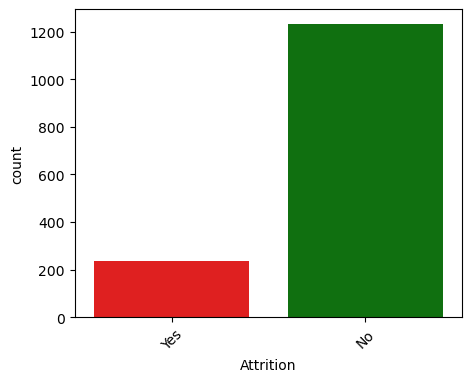

In [116]:
#Plotting the target variable-Attrition

plt.figure(figsize=(5,4))
color=['red' if (x == 'Yes') else 'green' for x in df['Attrition']]
sns.countplot(x='Attrition',data=df,palette=color)
plt.xticks(rotation = 45)
plt.show()

In [117]:
#Separating categorical variables from the total input features

cat_cols=['BusinessTravel','Department','Education', 'EducationField','EnvironmentSatisfaction', 'Gender','JobRole', 'JobSatisfaction',
       'MaritalStatus','Over18', 'OverTime','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print("\n")

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


Gender
Male      882
Female    588
Name: Gender, dtype: int64


JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resou

In [118]:
len(cat_cols)

14

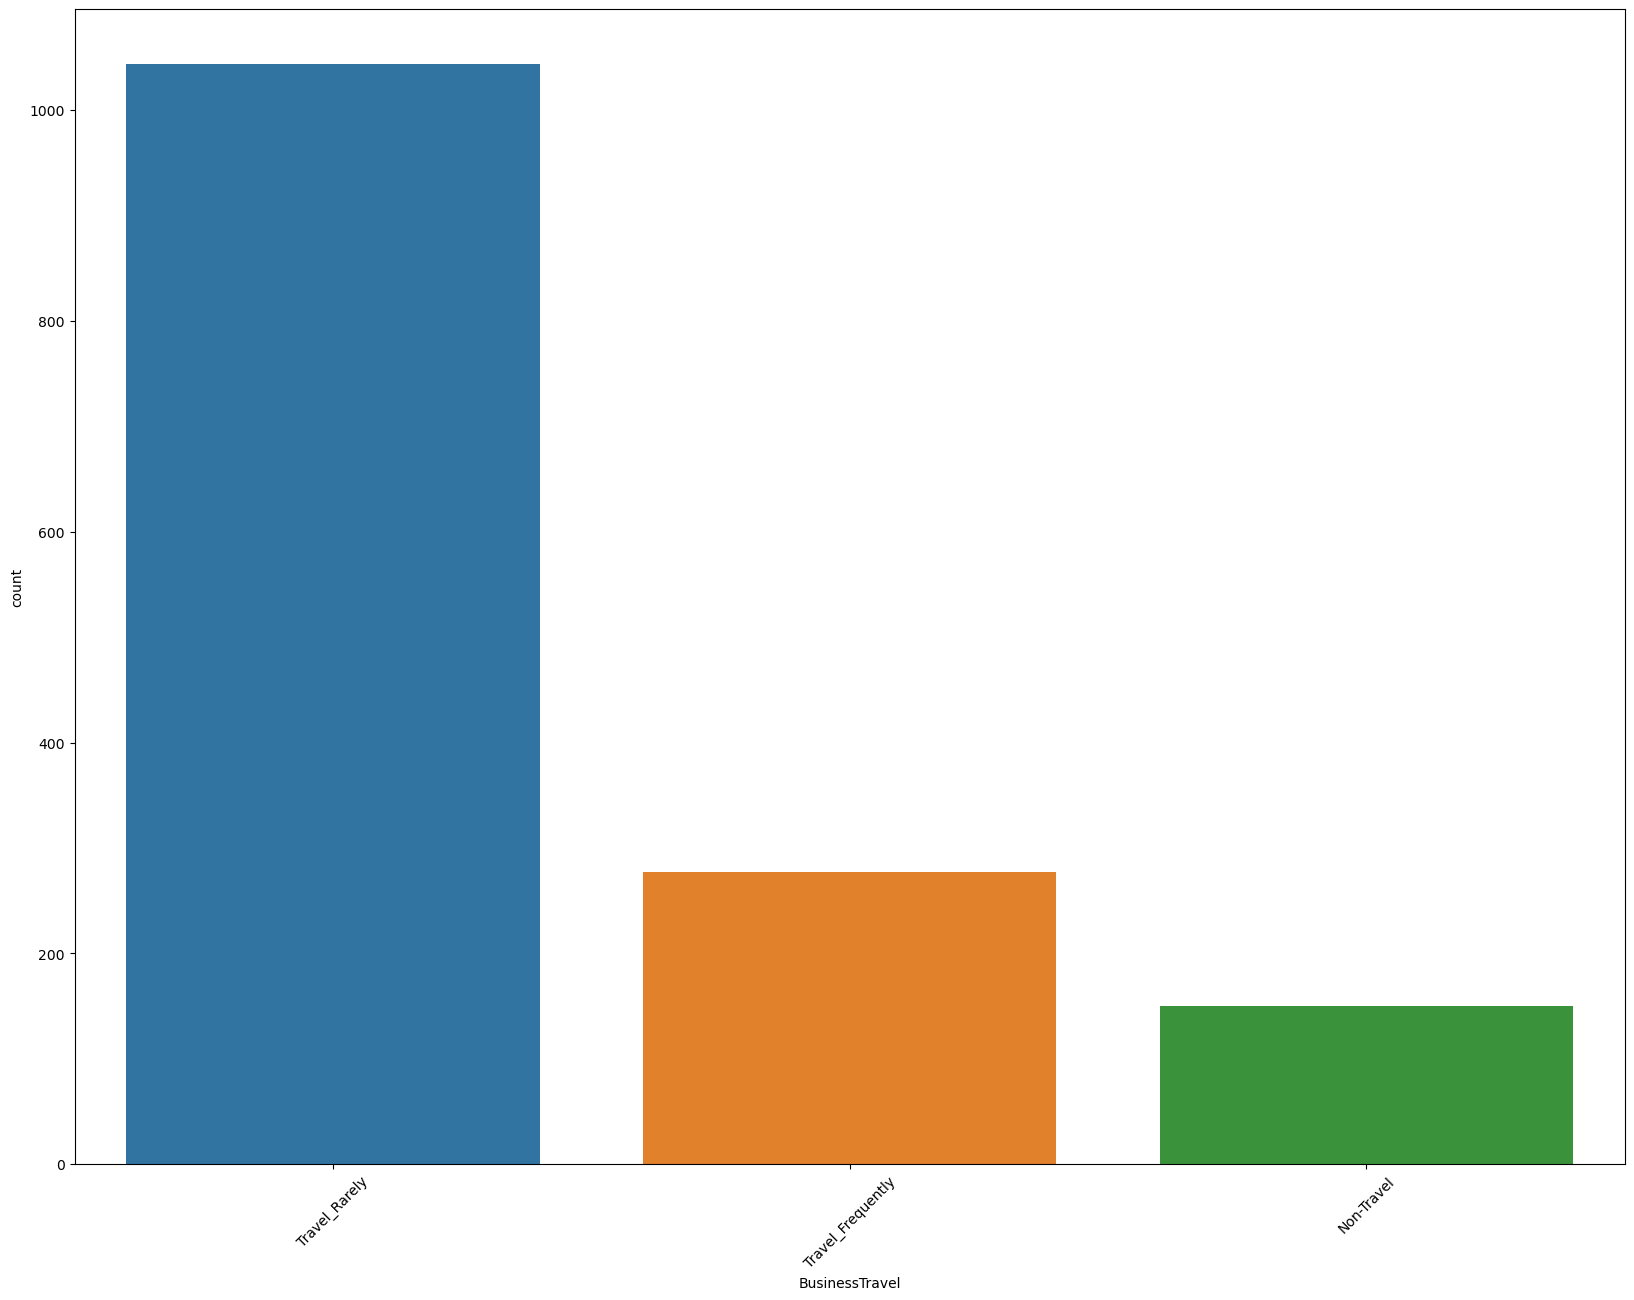

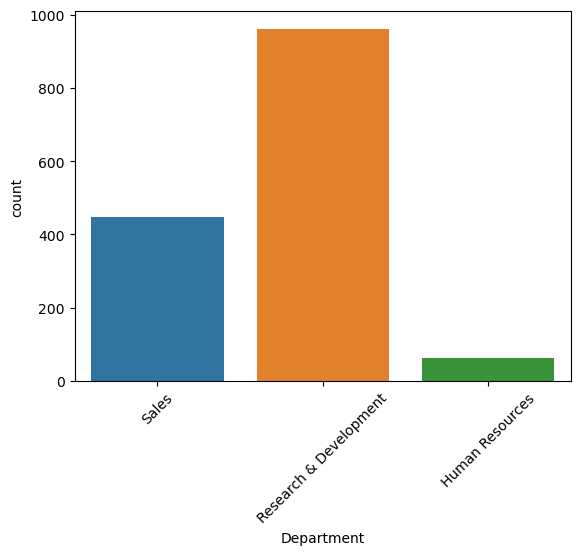

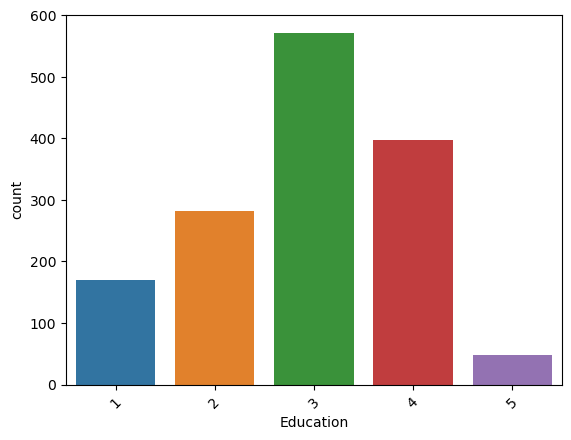

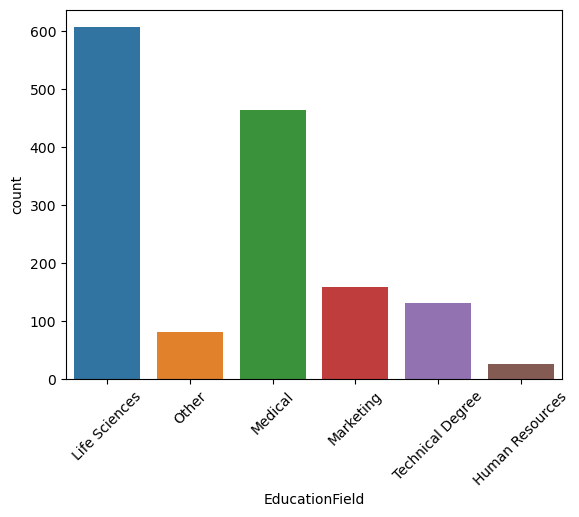

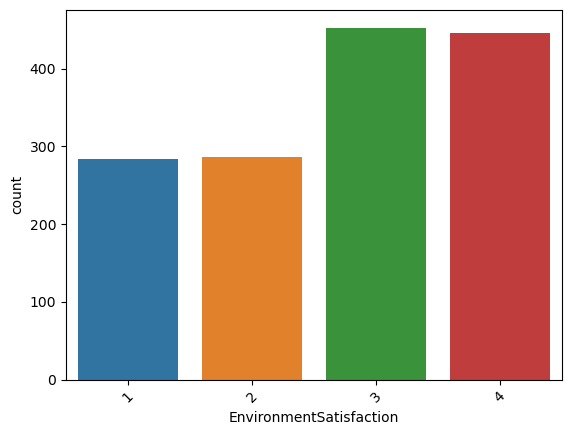

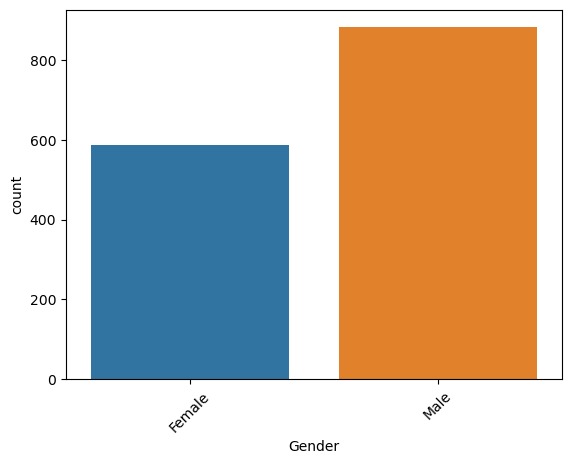

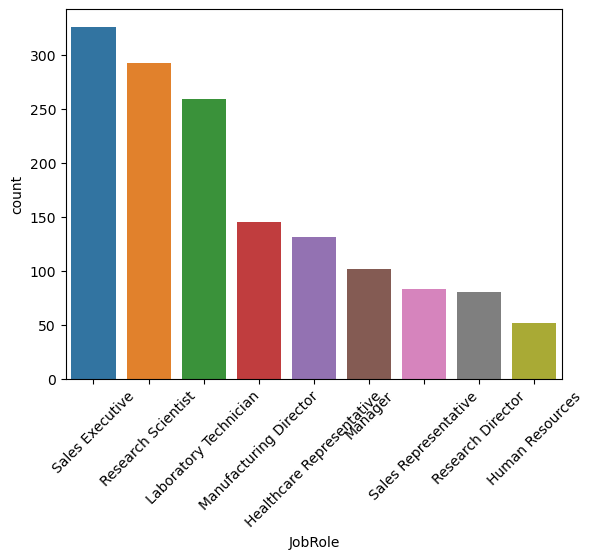

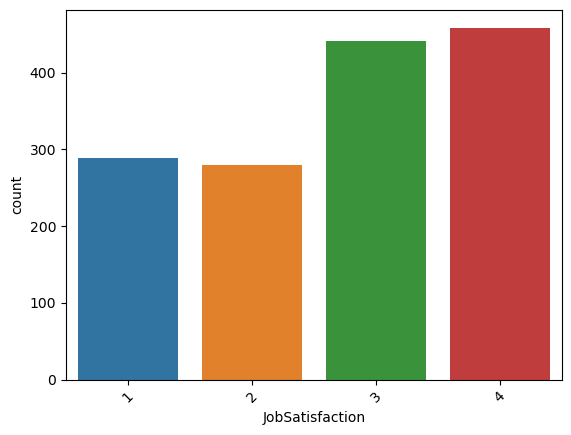

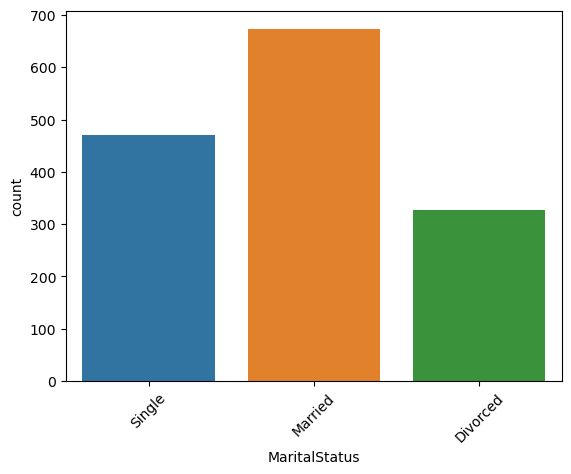

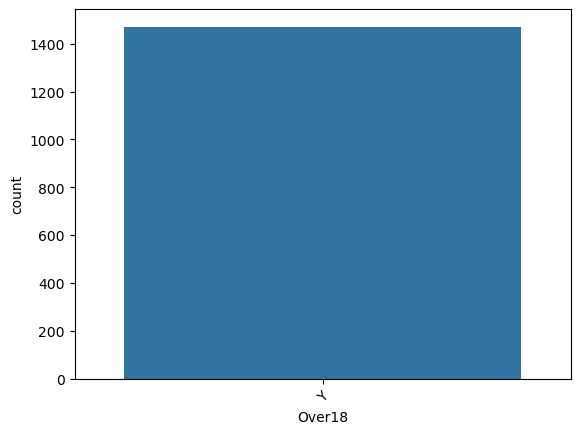

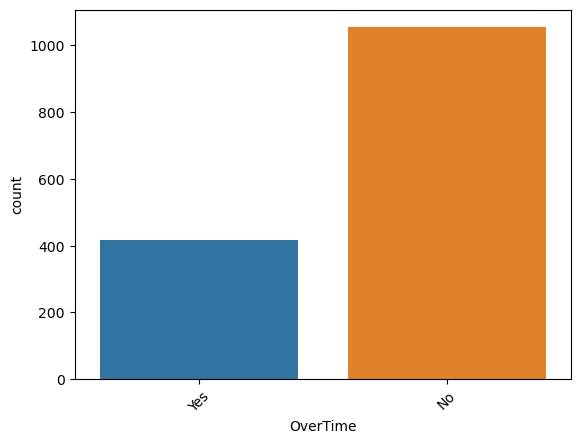

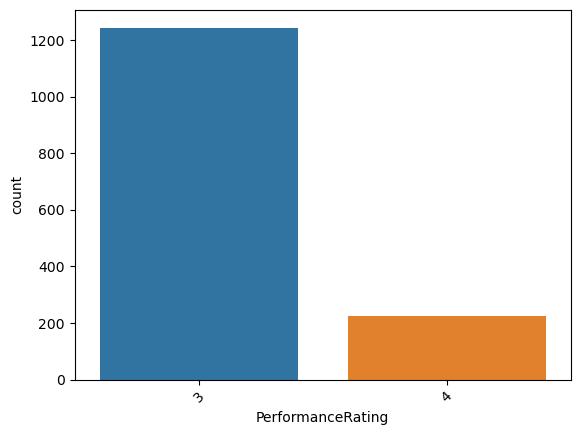

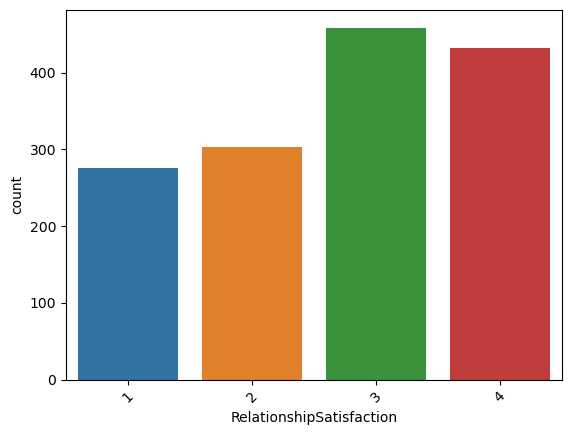

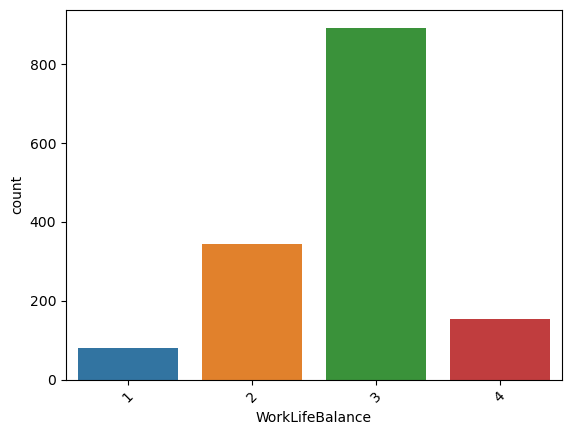

In [119]:
# Univariate Analysis of categorical variables

plt.figure(figsize=(20,15))
for col in cat_cols:
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=col,data=df)
    plt.xticks(rotation = 45)
    plt.show()

In [120]:
new_df_Overtime_Yes= df[df['OverTime'] == 'Yes'][['MonthlyIncome','Attrition']]
new_df_Overtime_Yes.groupby(['Attrition']).mean()

,MonthlyIncome
Attrition,
No,7365.328720
Yes,4689.889764


In [121]:
new_df_Overtime_No= df[df['OverTime'] == 'No'][['MonthlyIncome','Attrition']]
new_df_Overtime_No.groupby(['Attrition']).mean()

,MonthlyIncome
Attrition,
No,6669.690678
Yes,4899.318182


In [122]:
# Creating a list of quantitative features

num_cols=['Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','TrainingTimesLastYear']

In [123]:
len(num_cols)

11

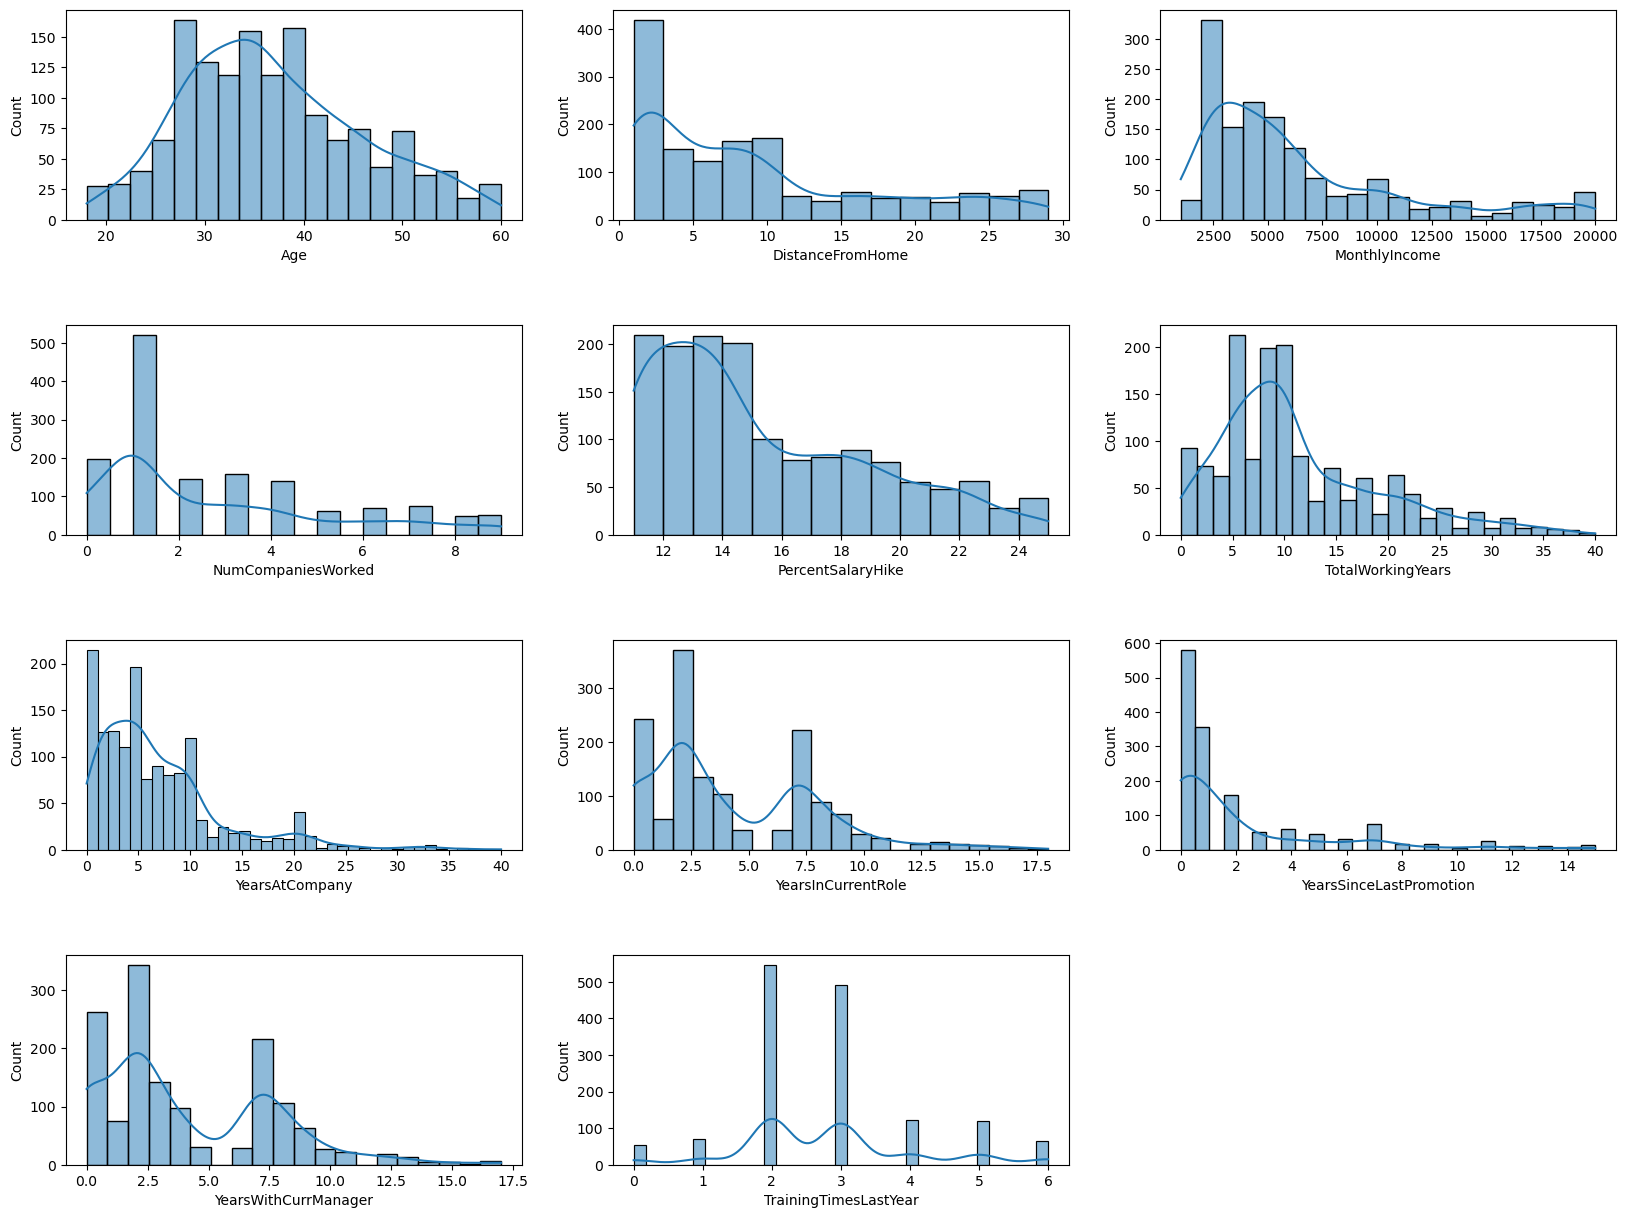

In [124]:
#Univariate Analysis of quantitative features

plt.figure(figsize=(20,15))
for i, col in enumerate(num_cols):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace=0.5)
    sns.histplot(x=col,data=df,kde=True)


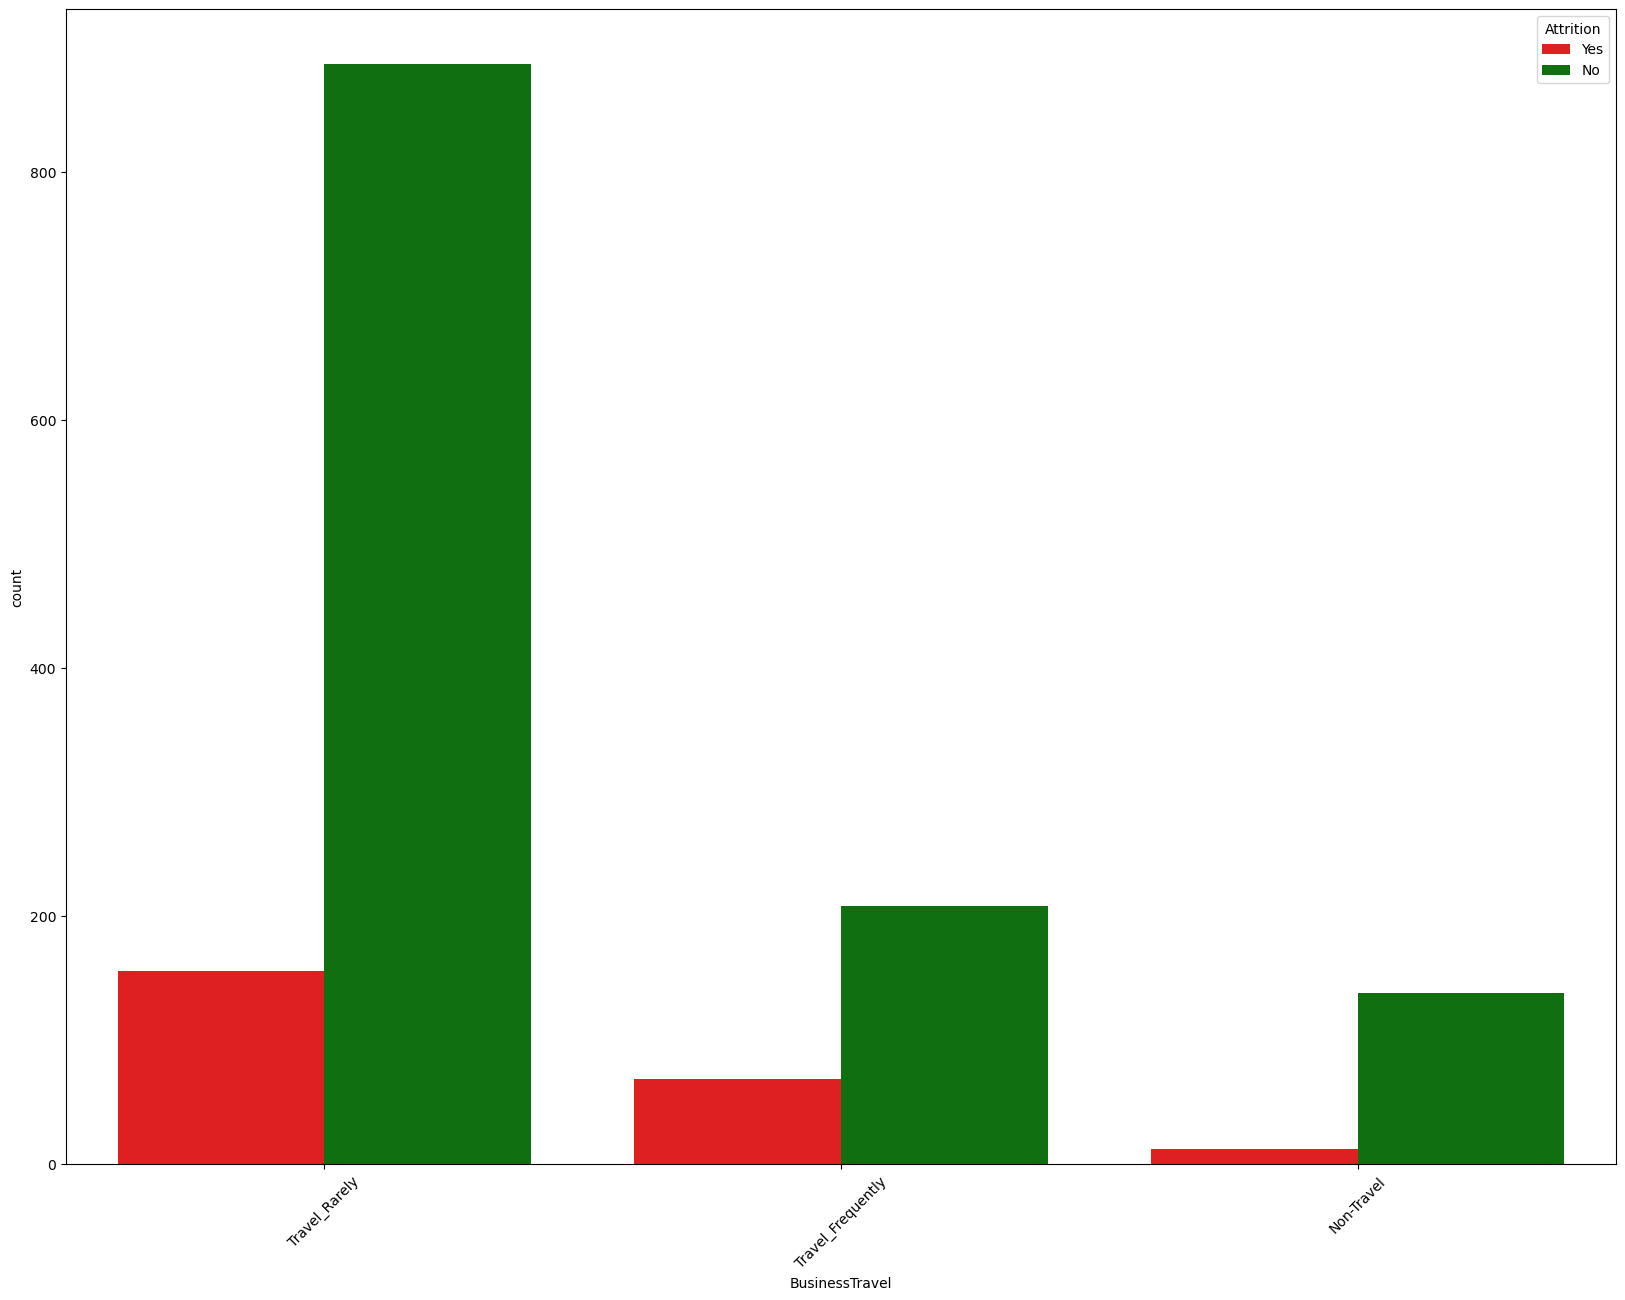

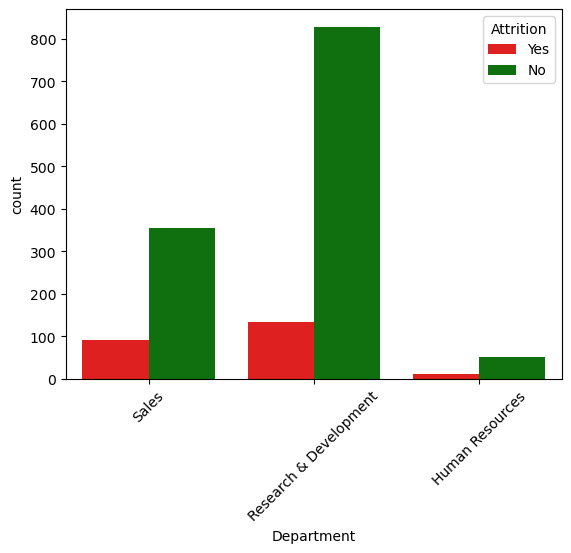

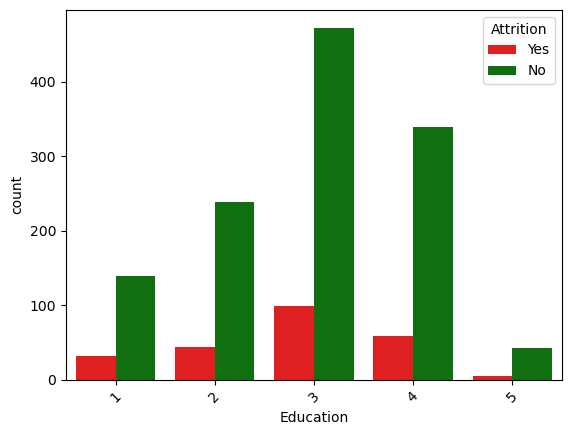

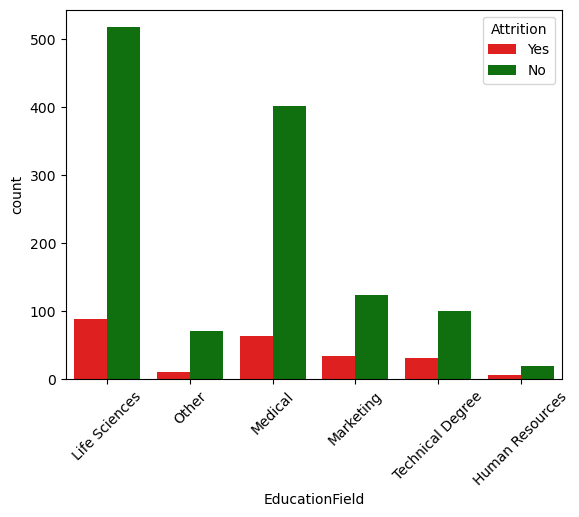

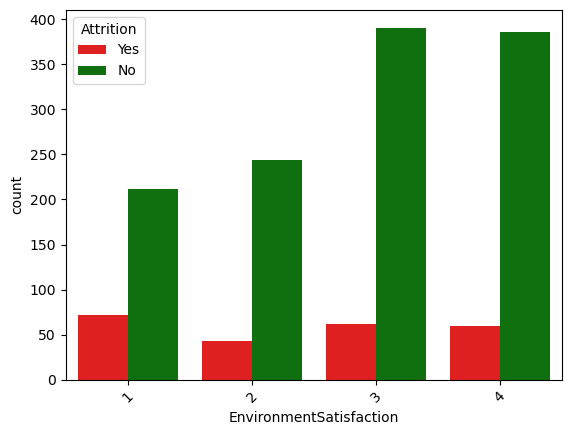

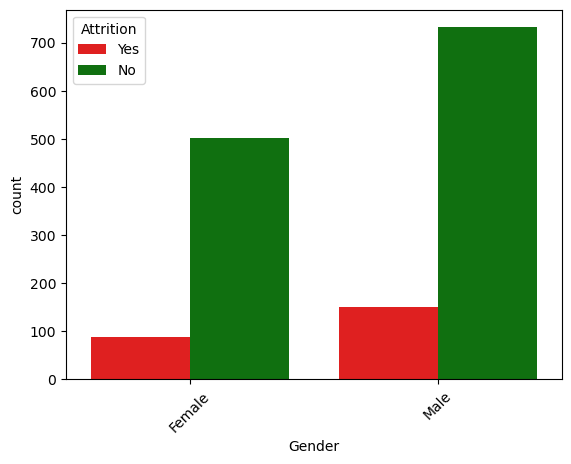

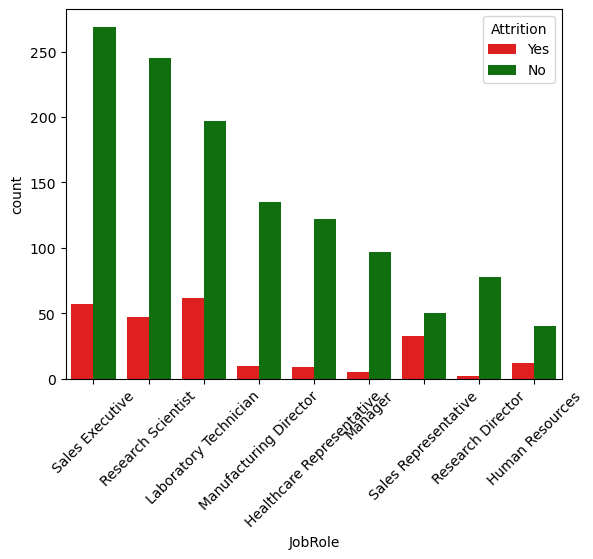

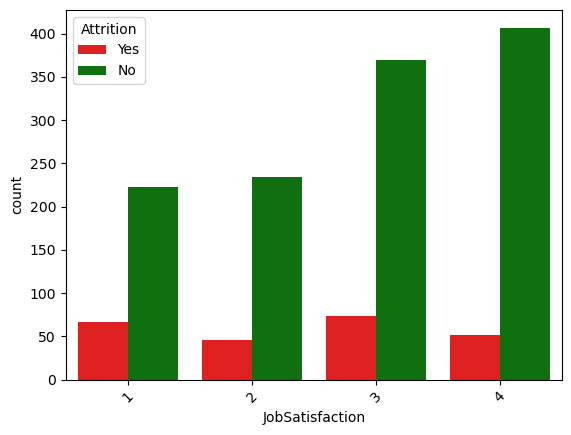

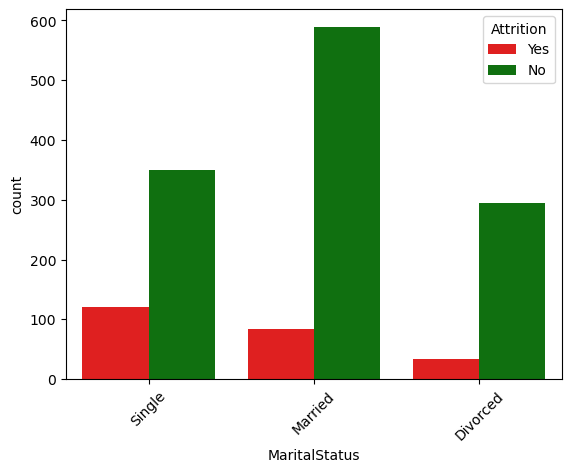

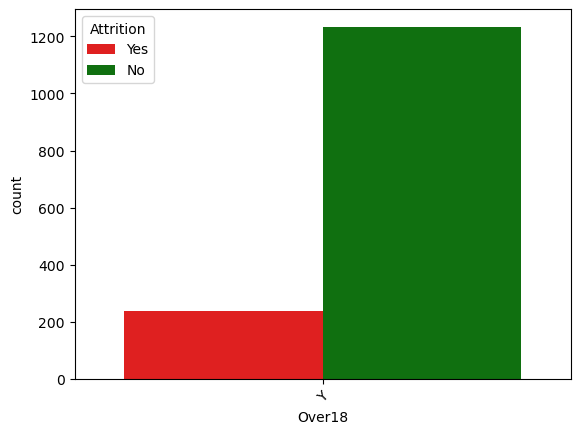

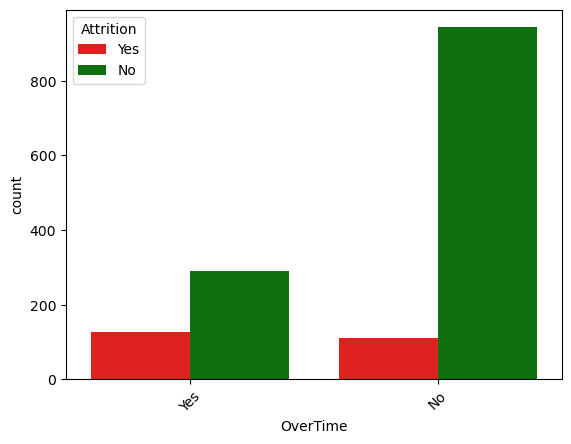

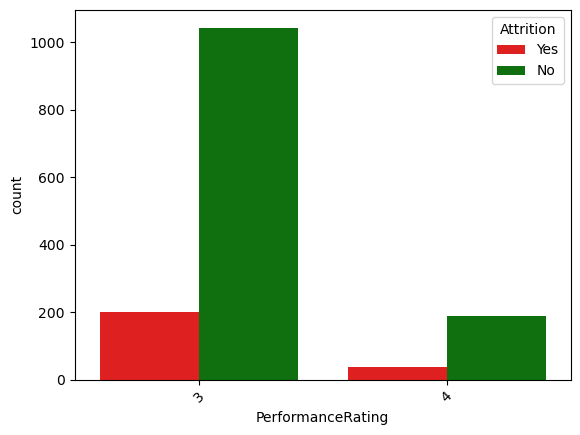

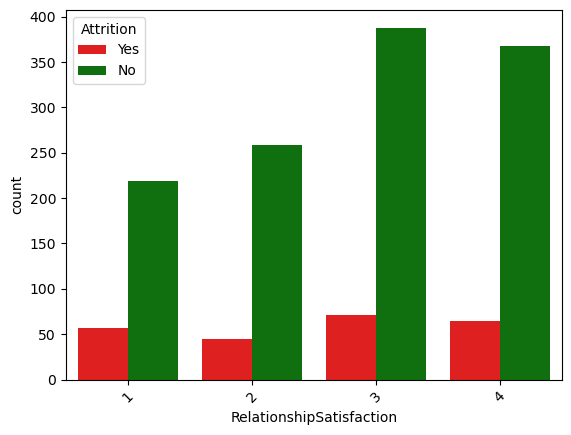

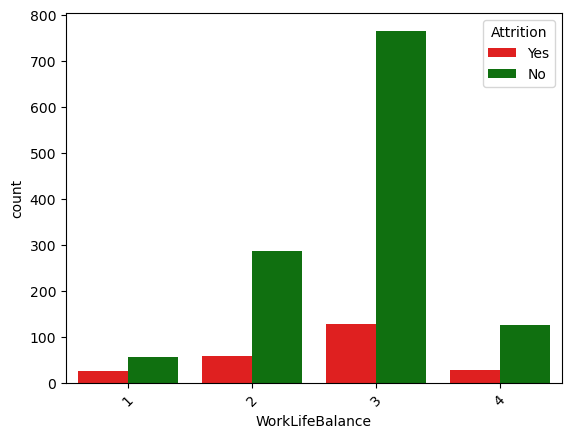

In [125]:
#Bivariate Analysis of categorical variables

plt.figure(figsize=(20,15))
for col in cat_cols:
    plt.subplots_adjust(hspace=0.5)
    color=['red' if (x == 'Yes') else 'green' for x in df['Attrition']]
    sns.countplot(x=col,data=df,hue='Attrition',palette=color)
    plt.xticks(rotation = 45)
    plt.show()

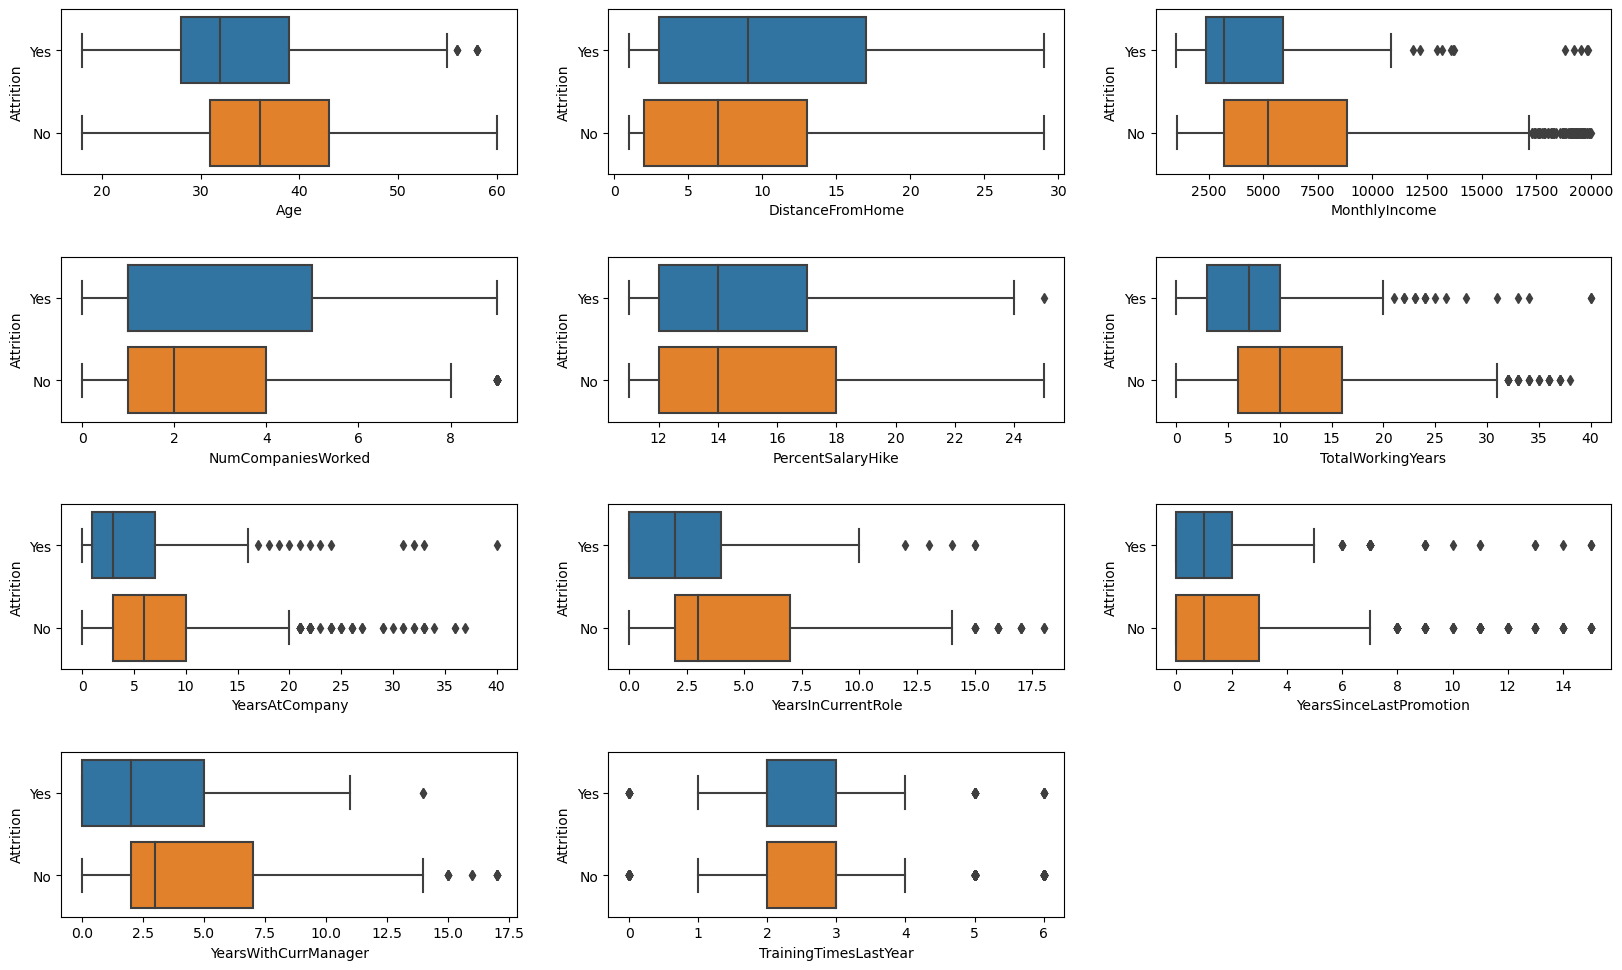

In [126]:
#Bivariate Analysis of quantitative features

plt.figure(figsize=(20,15))
for i, col in enumerate(num_cols):
    plt.subplot(5,3,i+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x=col,y='Attrition',data=df)

In [127]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Data Pre-processing

In [128]:
df.drop(columns=['Over18'], inplace = True)

In [129]:
#Encoding target variable

df['Attrition']=[1 if x == 'Yes' else 0 for x in df['Attrition']]

In [130]:
#Splitting dataset into 3 subsets to avoid data leakage

train, val, test = np.split(df.sample(frac=1, random_state=1), [int(.6*len(df)), int(.8*len(df))])

In [131]:
train.reset_index(drop=True,inplace=True)
val.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [132]:
train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobRole,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,1,Travel_Rarely,Research & Development,10,4,Medical,4,Male,Manufacturing Director,...,15,3,2,10,4,1,10,3,0,8
1,18,1,Travel_Frequently,Sales,3,2,Medical,2,Female,Sales Representative,...,12,3,3,0,2,4,0,0,0,0
2,30,1,Travel_Rarely,Research & Development,22,3,Life Sciences,1,Female,Research Scientist,...,11,3,2,7,2,3,5,2,0,1
3,34,0,Travel_Rarely,Sales,10,4,Life Sciences,3,Female,Sales Representative,...,19,3,4,1,2,3,1,1,0,0
4,56,0,Travel_Rarely,Research & Development,23,3,Life Sciences,4,Male,Manufacturing Director,...,12,3,1,33,0,3,19,16,15,9


In [133]:
nom_cats=['BusinessTravel', 'Department','EducationField','Gender','JobRole',  'MaritalStatus','OverTime']

In [134]:
#Encoding nominal categorical variables

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), nom_cats),
    remainder='passthrough',verbose_feature_names_out=False)

enc_train_df = pd.DataFrame(transformer.fit_transform(train),columns=transformer.get_feature_names_out())



In [135]:
enc_train_df.columns

Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes', 'Age',
       'Attrition', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompan

In [136]:
enc_train_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,15.0,3.0,2.0,10.0,4.0,1.0,10.0,3.0,0.0,8.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,12.0,3.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,11.0,3.0,2.0,7.0,2.0,3.0,5.0,2.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,19.0,3.0,4.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,12.0,3.0,1.0,33.0,0.0,3.0,19.0,16.0,15.0,9.0


In [137]:
enc_val_df=pd.DataFrame(transformer.transform(val),columns=transformer.get_feature_names_out())
enc_test_df = pd.DataFrame(transformer.transform(test),columns=transformer.get_feature_names_out())

In [138]:
print(len(enc_train_df[enc_train_df['Attrition']==0]))
print(len(enc_train_df[enc_train_df['Attrition']==1]))


739
143


In [139]:
input_features = enc_train_df.drop(columns= ['Attrition']).columns

In [140]:
input_features

Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes', 'Age',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
 

In [141]:
# Function for creating a balanced dataset

def create_balanced_set(data,oversample,undersample):
    X= data.drop(columns=['Attrition']).values
    y= data.iloc[:,1].values
    
    
    if oversample == True & undersample == True:
        ros=RandomOverSampler(random_state=4)
        X_over,y_over =ros.fit_resample(X,y)
        rus=RandomUnderSampler(random_state=4)
        X,y = rus.fit_resample(X_over,y_over)
    
    return X,y


In [142]:
X_train,y_train= create_balanced_set(enc_train_df, oversample =True,undersample=True)
X_val,y_val = create_balanced_set(enc_val_df, oversample = False,undersample=False)
X_test,y_test = create_balanced_set(enc_test_df, oversample = False,undersample=False)

In [143]:
X_train=pd.DataFrame(data=X_train,columns=input_features)
X_val= pd.DataFrame(data=X_val,columns=input_features)
X_test=pd.DataFrame(data=X_test,columns=input_features)

In [144]:
print(sum(y_train==1.0))
print(sum(y_train==0.0))

706
706


In [145]:
len(y_test)

294

In [146]:
# Clubbing train and validation sets for gridsearch cross validation

#X = np.vstack([X_train,X_val])
X=pd.concat([X_train,X_val])
y=np.vstack([y_train.reshape(-1,1),y_val.reshape(-1,1)])

In [147]:
X

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,15.0,3.0,2.0,10.0,4.0,1.0,10.0,3.0,0.0,8.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,11.0,3.0,2.0,7.0,2.0,3.0,5.0,2.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,19.0,3.0,4.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,12.0,3.0,1.0,33.0,0.0,3.0,19.0,16.0,15.0,9.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,15.0,3.0,2.0,5.0,6.0,3.0,4.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,12.0,3.0,2.0,8.0,2.0,4.0,3.0,2.0,1.0,2.0
290,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,12.0,3.0,4.0,25.0,5.0,3.0,19.0,17.0,2.0,8.0
291,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,11.0,3.0,3.0,10.0,2.0,3.0,6.0,3.0,1.0,2.0
292,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,15.0,3.0,2.0,6.0,3.0,2.0,2.0,2.0,2.0,2.0


In [148]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [149]:
# Importing libraries for evaluation metrics and hyper-parameter tuning
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,plot_confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV


In [150]:
# To plot confusion matrix

def plot_matrix(model,X,y):
    plot_confusion_matrix(model,X,y)

In [151]:
# To print classification report

def print_evaluation_report(y_true,y_pred,target=['No','Yes']):
    print(classification_report(y_true,y_pred,target_names=target))

## Building base models

### 1. Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [154]:
y_val_pred=logreg.predict(X_val)

In [155]:
accuracy=accuracy_score(y_val,y_val_pred)
print("Training Accuracy: ", accuracy_score(y_train,logreg.predict(X_train)))
print("Validation Accuracy: ", accuracy)

Training Accuracy:  0.9752124645892352
Validation Accuracy:  0.9591836734693877


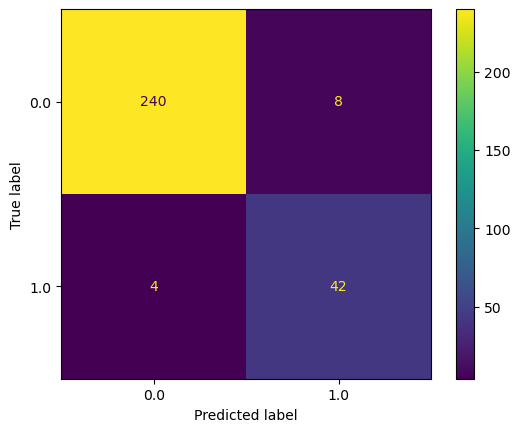

In [156]:
plot_matrix(logreg, X_val, y_val)

In [157]:
print_evaluation_report(y_val,y_val_pred)


              precision    recall  f1-score   support

          No       0.98      0.97      0.98       248
         Yes       0.84      0.91      0.87        46

    accuracy                           0.96       294
   macro avg       0.91      0.94      0.93       294
weighted avg       0.96      0.96      0.96       294



### 2. KNN classifier

In [158]:
from sklearn.neighbors import KNeighborsClassifier

In [159]:
knn_model= KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [160]:
y_val_pred=knn_model.predict(X_val)

In [161]:
accuracy=accuracy_score(y_val,y_val_pred)
print('Training Accuracy: ',accuracy_score(y_train,knn_model.predict(X_train)))
print('Validation Accuracy: ',accuracy)

Training Accuracy:  0.8314447592067988
Validation Accuracy:  0.608843537414966


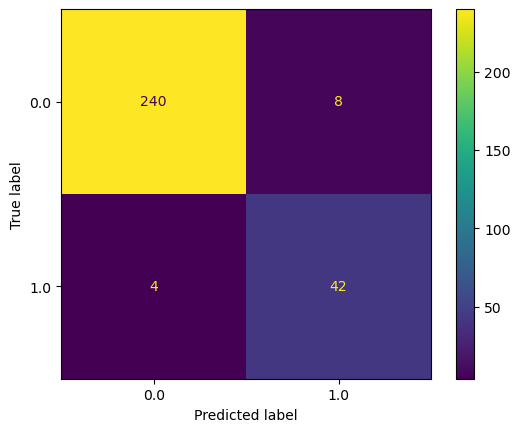

In [162]:
plot_matrix(logreg, X_val, y_val)

In [163]:
print_evaluation_report(y_val,y_val_pred)

              precision    recall  f1-score   support

          No       0.87      0.63      0.73       248
         Yes       0.19      0.48      0.28        46

    accuracy                           0.61       294
   macro avg       0.53      0.56      0.50       294
weighted avg       0.76      0.61      0.66       294



### 3. Random Forest Classifier

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
rnd_forest=RandomForestClassifier(n_estimators=1,bootstrap=False,random_state=1,class_weight='balanced')
rnd_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced', n_estimators=1,
                       random_state=1)

In [166]:
y_val_pred=rnd_forest.predict(X_val)

In [167]:
accuracy=accuracy_score(y_val,y_val_pred)
print('Training Accuracy: ',accuracy_score(y_train,rnd_forest.predict(X_train)))
print('Validation Accuracy: ',accuracy)

Training Accuracy:  1.0
Validation Accuracy:  1.0


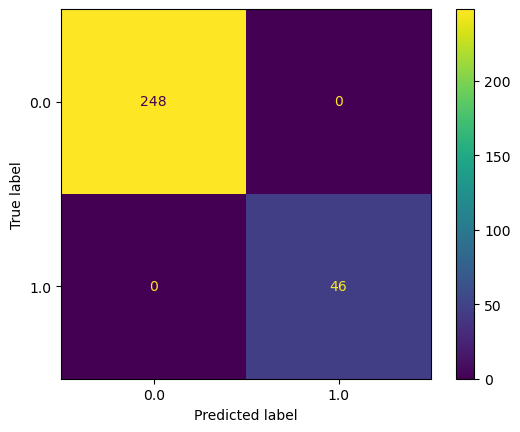

In [168]:
plot_matrix(rnd_forest, X_val, y_val)

In [169]:
print_evaluation_report(y_val,y_val_pred)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       248
         Yes       1.00      1.00      1.00        46

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



## Hyper-parameter Tuning

### 1. Logistic Regression

In [170]:
param_grid_1= {'solver' : ['liblinear'], 
               'penalty' : [None,'l1','l2'], 
               'C' : [100, 10, 1.0, 0.1, 0.01,0.001]}

In [171]:
grid_1=GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_1,refit=True,cv=5,n_jobs=-1,verbose=3)
grid_1.fit(X,y)
print(grid_1.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [172]:
y_pred_train=grid_1.predict(X_train)
y_pred_val=grid_1.predict(X_val)
y_test_pred= grid_1.predict(X_test)
print("Training accuracy = ",accuracy_score(y_train,y_pred_train))
print("Validation accuracy = ",accuracy_score(y_val,y_pred_val))
print('Testing accuracy = ',accuracy_score(y_test,y_test_pred))

Training accuracy =  1.0
Validation accuracy =  1.0
Testing accuracy =  1.0


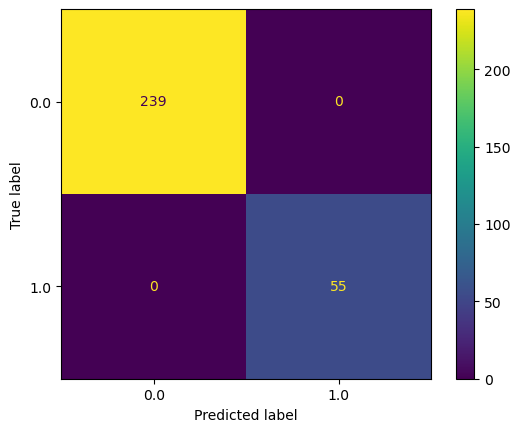

In [173]:
plot_matrix(grid_1,X_test,y_test)

In [174]:
print_evaluation_report(y_test,y_test_pred)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       239
         Yes       1.00      1.00      1.00        55

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [175]:
y_test_prob=grid_1.predict_proba(X_test)[:,1]

In [176]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_test_prob)

In [177]:
 print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_test_prob))

roc_auc_score for Logistic Regression:  1.0


Text(0, 0.5, 'True Positive Rate')

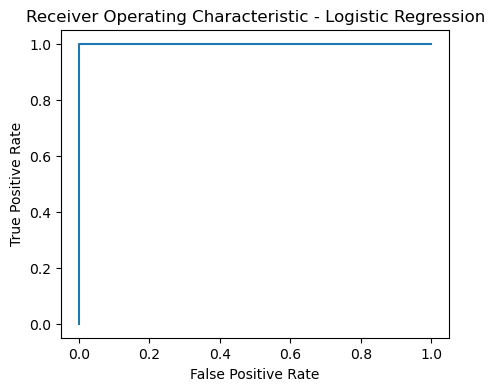

In [178]:
plt.figure(figsize=(5,4))
plt.plot(false_positive_rate,true_positive_rate)
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### 2. KNN Classifier

In [179]:
param_grid_2 = {'n_neighbors' : [3,5,7,9,11,13,15,18,20],
               'weights' : ['uniform', 'distance'],
               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'leaf_size': [10, 20, 30, 40, 50, 60],
               'p':[1,2],
               'metric' : ['minkowski','euclidean','manhattan']}

In [180]:
grid_2=GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_2,refit=True,cv=5,n_jobs=-1,verbose=3)
grid_2.fit(X,y)
print(grid_2.best_params_)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [181]:
y_pred_train=grid_2.predict(X_train)
y_pred_val=grid_2.predict(X_val)
y_test_pred= grid_2.predict(X_test)
print("Training accuracy = ",accuracy_score(y_train,y_pred_train))
print("Validation accuracy = ",accuracy_score(y_val,y_pred_val))
print('Testing accuracy = ',accuracy_score(y_test,y_test_pred))

Training accuracy =  1.0
Validation accuracy =  1.0
Testing accuracy =  0.6224489795918368


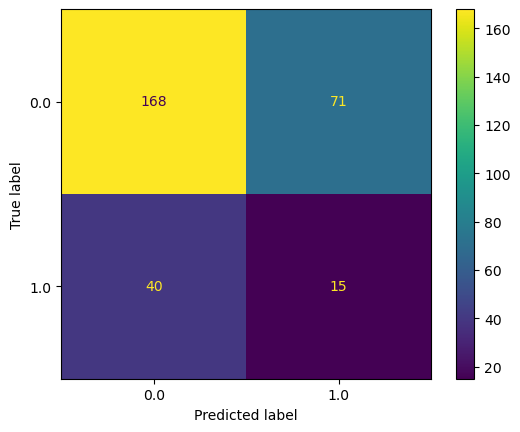

In [182]:
plot_matrix(grid_2,X_test,y_test)

In [183]:
print_evaluation_report(y_test,y_test_pred)

              precision    recall  f1-score   support

          No       0.81      0.70      0.75       239
         Yes       0.17      0.27      0.21        55

    accuracy                           0.62       294
   macro avg       0.49      0.49      0.48       294
weighted avg       0.69      0.62      0.65       294



### 3. Random Forest Classifier

In [184]:
param_grid_3= {'bootstrap': [True,False],
    'max_depth': [10,20,50,100],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]}

In [185]:
grid_3=GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_3,refit=True,cv=5,n_jobs=-1,verbose=3)
grid_3.fit(X,y)
print(grid_3.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [186]:
y_pred_train=grid_3.predict(X_train)
y_pred_val=grid_3.predict(X_val)
y_test_pred= grid_3.predict(X_test)
print("Training accuracy = ",accuracy_score(y_train,y_pred_train))
print("Validation accuracy = ",accuracy_score(y_val,y_pred_val))
print('Testing accuracy = ',accuracy_score(y_test,y_test_pred))

Training accuracy =  1.0
Validation accuracy =  1.0
Testing accuracy =  1.0


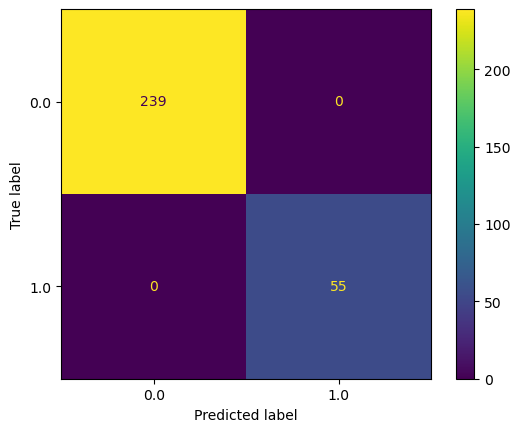

In [187]:
plot_matrix(grid_3,X_test,y_test)

In [188]:
print_evaluation_report(y_test,y_test_pred)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00       239
         Yes       1.00      1.00      1.00        55

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

